## Ada Boost

You can __boost__ the performance of the weak learner models by sequentially focusing on the errors of previous models.

The __AdaBoost__ involves assigning weights to each training sample, such that misclassified samples get higher weights. This helps subsequent learners to try harder to get the errors right. 

Final prediction is a weighted vote, where better performing models have more influence.


Let:
- $ D_i^{(j)} $ be the weight of training instance $ i $ at iteration $ j $
- $ h_j(x_i) $ be the prediction of the weak learner on input $ x_i $
- $ y_i \in \{-1, +1\} $ be the true label

The weighted error of the $j^{th}$ weak learner is:

$
\varepsilon_j = \sum_{i=1}^{n} D_i^{(j)} \cdot \mathbb{I}(h_j(x_i) \ne y_i)
$

Where:
- $ \mathbb{I}(h_j(x_i) \ne y_i) $ is the indicator function (1 if misclassified, 0 otherwise)

| **Component**                  | **Formula** |
|-------------------------------|-------------|
| **Weighted Error**            | $ \varepsilon_j = \sum_{i=1}^{n} D_i^{(j)} \cdot \mathbb{I}(h_j(x_i) \ne y_i) $ |
| **Alpha (Predictor Weight)**  | $ \alpha_j = \frac{1}{2} \ln\left(\frac{1 - \varepsilon_j}{\varepsilon_j}\right) $ |
| **Weight Update Rule**        | $ D_i^{(j+1)} = \frac{D_i^{(j)} \cdot \exp(-\alpha_j y_i h_j(x_i))}{Z_j} $ |
| **Final Prediction**          | $ H(x) = \text{sign}\left(\sum_{j=1}^{T} \alpha_j h_j(x) \right) $ |

__Note:__ If AdaBoost is overfitting the training set, reduce number of estimators or strongly regularize the base estimator.

- Type: Boosting (Additive Model)
- Objective: $\min_H \sum_{i=1}^{n} \exp(-y_i H(x_i))$ $H(x) = \sum_{t=1}^{T} \alpha_t h_t(x)$
- Weight Update: $w_i^{(t+1)} = w_i^{(t)} \cdot \exp(-\alpha_t y_i h_t(x_i))$

In [2]:
from sklearn.metrics import accuracy_score
import numpy as np


In [3]:
# Create a dataset
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.5,
    random_state=42).fit(X_train, y_train)


In [5]:
y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Accuracy is: {accuracy_score(y_test, y_pred)}")

AdaBoost Accuracy is: 0.896


In [6]:
print("Feature importances:", ada_clf.feature_importances_)

Feature importances: [0.61628591 0.38371409]


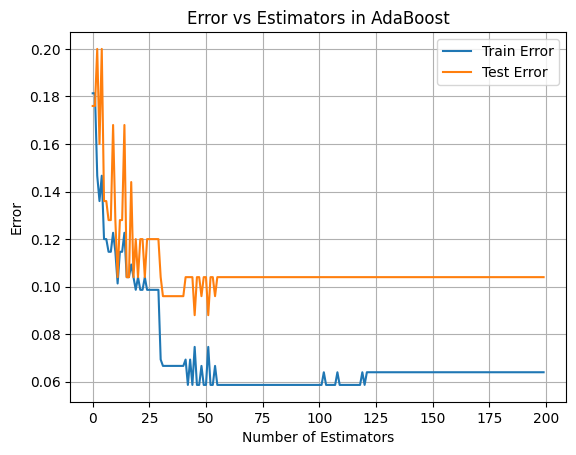

In [7]:
#  Error Evolution (Learning Curve):  training and test error evolution:
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


test_errors = []
train_errors = []
for y_train_pred, y_test_pred in zip(ada_clf.staged_predict(X_train),
                                     ada_clf.staged_predict(X_test)):
    train_errors.append(zero_one_loss(y_train, y_train_pred))
    test_errors.append(zero_one_loss(y_test, y_test_pred))

plt.plot(train_errors, label="Train Error")
plt.plot(test_errors, label="Test Error")
plt.legend()
plt.xlabel("Number of Estimators")
plt.ylabel("Error")
plt.title("Error vs Estimators in AdaBoost")
plt.grid(True)
plt.show()

In [8]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3,
                 cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()

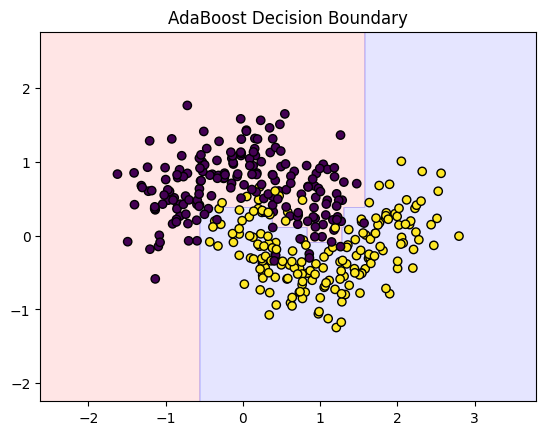

In [9]:
plot_decision_boundary(ada_clf, X_train, y_train, "AdaBoost Decision Boundary")

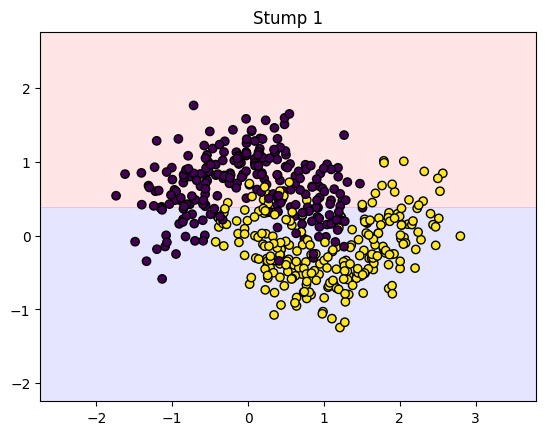

In [10]:
plot_decision_boundary(ada_clf.estimators_[0], X, y, "Stump 1")

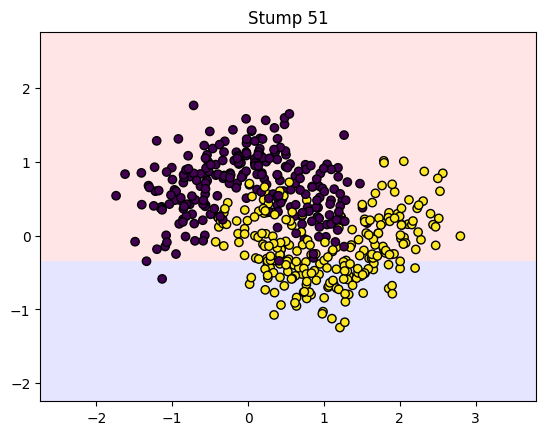

In [13]:
plot_decision_boundary(ada_clf.estimators_[100], X, y, "Stump 51")